# FIFA 21/22 Anlysis
## Project 1 - Team 5 


## Questions to be solved:
### Which countries and clubs have the highest and best representation of players?
### Which clubs are the most diverse (representation by Country)?
### How do the economic indicators of players vary based on their position and some characteristics?
### What representation does Mexico have in the dataset?
### What are some fun facts?


In [1]:
# Import dependencies
import pandas as pd 
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import scipy.stats as st


## Import Datasets

In [2]:
df_21 = pd.read_csv("FIFA21_official_data.csv")
df_22 = pd.read_csv("FIFA22_official_data.csv")


df_21["Year"] = 2021
df_22["Year"] = 2022
df_21.head()

ID              Name  Age  \
0  176580         L. Suárez   33   
1  192985      K. De Bruyne   29   
2  212198   Bruno Fernandes   25   
3  194765      A. Griezmann   29   
4  224334          M. Acuña   28   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/176/580/20_60.png     Uruguay   
1  https://cdn.sofifa.com/players/192/985/20_60.png     Belgium   
2  https://cdn.sofifa.com/players/212/198/20_60.png    Portugal   
3  https://cdn.sofifa.com/players/194/765/20_60.png      France   
4  https://cdn.sofifa.com/players/224/334/20_60.png   Argentina   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.com/flags/uy.png       87         87    Atlético Madrid   
1  https://cdn.sofifa.com/flags/be.png       91         91    Manchester City   
2  https://cdn.sofifa.com/flags/pt.png       87         90  Manchester United   
3  https://cdn.sofifa.com/flags/fr.png       87         87       FC Barcelona   
4  https://cdn.sofifa.com/flags/ar.png       83         83         Sevilla FC   

                                       Club Logo  ... GKDiving GKHandling  \
0  https://cdn.sofifa.com/teams/240/light_30.png  ...       27         25   
1   https://cdn.sofifa.com/teams/10/light_30.png  ...       15         13   
2   https://cdn.sofifa.com/teams/11/light_30.png  ...       12         14   
3  https://cdn.sofifa.com/teams/241/light_30.png  ...       14          8   
4  https://cdn.sofifa.com/teams/481/light_30.png  ...        8         14   

   GKKicking GKPositioning  GKReflexes  Best Position  Best Overall Rating  \
0         31            33          37             ST                   87   
1          5            10          13            CAM                   91   
2         15             8          14            CAM                   88   
3         14            13          14             ST                   87   
4         13            13          14             LB                   83   

  Release Clause DefensiveAwareness  Year  
0         €64.6M               57.0  2021  
1          €161M               68.0  2021  
2        €124.4M               72.0  2021  
3        €103.5M               59.0  2021  
4         €46.2M               79.0  2021  

[5 rows x 66 columns]

## Data Cleaning
### Remove "lbs" and "kg" from weight variable

In [3]:
df_21["Weight"] = df_21["Weight"].astype(str)

df_21["Weight"] = df_21["Weight"].str.replace("lbs", "")

# Convertir el valor a un número decimal
df_21["Weight"] = pd.to_numeric(df_21["Weight"], errors='coerce')

# Multiplicar el valor por 1,000 para los valores en millones
df_21["Weight"] = df_21["Weight"] * .453592

df_21.head()

ID              Name  Age  \
0  176580         L. Suárez   33   
1  192985      K. De Bruyne   29   
2  212198   Bruno Fernandes   25   
3  194765      A. Griezmann   29   
4  224334          M. Acuña   28   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/176/580/20_60.png     Uruguay   
1  https://cdn.sofifa.com/players/192/985/20_60.png     Belgium   
2  https://cdn.sofifa.com/players/212/198/20_60.png    Portugal   
3  https://cdn.sofifa.com/players/194/765/20_60.png      France   
4  https://cdn.sofifa.com/players/224/334/20_60.png   Argentina   

                                  Flag  Overall  Potential               Club  \
0  https://cdn.sofifa.com/flags/uy.png       87         87    Atlético Madrid   
1  https://cdn.sofifa.com/flags/be.png       91         91    Manchester City   
2  https://cdn.sofifa.com/flags/pt.png       87         90  Manchester United   
3  https://cdn.sofifa.com/flags/fr.png       87         87       FC Barcelona   
4  https://cdn.sofifa.com/flags/ar.png       83         83         Sevilla FC   

                                       Club Logo  ... GKDiving GKHandling  \
0  https://cdn.sofifa.com/teams/240/light_30.png  ...       27         25   
1   https://cdn.sofifa.com/teams/10/light_30.png  ...       15         13   
2   https://cdn.sofifa.com/teams/11/light_30.png  ...       12         14   
3  https://cdn.sofifa.com/teams/241/light_30.png  ...       14          8   
4  https://cdn.sofifa.com/teams/481/light_30.png  ...        8         14   

   GKKicking GKPositioning  GKReflexes  Best Position  Best Overall Rating  \
0         31            33          37             ST                   87   
1          5            10          13            CAM                   91   
2         15             8          14            CAM                   88   
3         14            13          14             ST                   87   
4         13            13          14             LB                   83   

  Release Clause DefensiveAwareness  Year  
0         €64.6M               57.0  2021  
1          €161M               68.0  2021  
2        €124.4M               72.0  2021  
3        €103.5M               59.0  2021  
4         €46.2M               79.0  2021  

[5 rows x 66 columns]

In [4]:
df_22["Weight"] = df_22["Weight"].astype(str)

df_22["Weight"] = df_22["Weight"].str.replace("kg", "")

# Convertir el valor a un número decimal
df_22["Weight"] = pd.to_numeric(df_22["Weight"], errors='coerce')

# Multiplicar el valor por 1,000 para los valores en millones
df_22["Weight"] = df_22["Weight"] * 1.001

df_22.head()

ID             Name  Age  \
0  212198  Bruno Fernandes   26   
1  209658      L. Goretzka   26   
2  176580        L. Suárez   34   
3  192985     K. De Bruyne   30   
4  224334         M. Acuña   29   

                                              Photo Nationality  \
0  https://cdn.sofifa.com/players/212/198/22_60.png    Portugal   
1  https://cdn.sofifa.com/players/209/658/22_60.png     Germany   
2  https://cdn.sofifa.com/players/176/580/22_60.png     Uruguay   
3  https://cdn.sofifa.com/players/192/985/22_60.png     Belgium   
4  https://cdn.sofifa.com/players/224/334/22_60.png   Argentina   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.com/flags/pt.png       88         89   
1  https://cdn.sofifa.com/flags/de.png       87         88   
2  https://cdn.sofifa.com/flags/uy.png       88         88   
3  https://cdn.sofifa.com/flags/be.png       91         91   
4  https://cdn.sofifa.com/flags/ar.png       84         84   

                 Club                                Club Logo  ... GKDiving  \
0   Manchester United   https://cdn.sofifa.com/teams/11/30.png  ...       12   
1   FC Bayern München   https://cdn.sofifa.com/teams/21/30.png  ...       13   
2  Atlético de Madrid  https://cdn.sofifa.com/teams/240/30.png  ...       27   
3     Manchester City   https://cdn.sofifa.com/teams/10/30.png  ...       15   
4          Sevilla FC  https://cdn.sofifa.com/teams/481/30.png  ...        8   

  GKHandling  GKKicking GKPositioning  GKReflexes  Best Position  \
0         14         15             8          14            CAM   
1          8         15            11           9             CM   
2         25         31            33          37             ST   
3         13          5            10          13             CM   
4         14         13            13          14             LB   

   Best Overall Rating Release Clause DefensiveAwareness  Year  
0                   88        €206.9M               72.0  2022  
1                   87        €160.4M               74.0  2022  
2                   88         €91.2M               42.0  2022  
3                   91        €232.2M               68.0  2022  
4                   84         €77.7M               80.0  2022  

[5 rows x 66 columns]

### Merge the 2021 and 2022 dataframes by the selected columns

In [5]:
merged_df = pd.concat([df_21, df_22])
merged_df_clean = merged_df[["Year","ID","Name", "Age","Nationality","Overall","Potential","Club","Value","Best Position","Height","Weight","Wage","Jersey Number","Best Overall Rating","Preferred Foot"]]
merged_df_clean.head()

Year      ID              Name  Age Nationality  Overall  Potential  \
0  2021  176580         L. Suárez   33     Uruguay       87         87   
1  2021  192985      K. De Bruyne   29     Belgium       91         91   
2  2021  212198   Bruno Fernandes   25    Portugal       87         90   
3  2021  194765      A. Griezmann   29      France       87         87   
4  2021  224334          M. Acuña   28   Argentina       83         83   

                Club   Value Best Position Height     Weight   Wage  \
0    Atlético Madrid  €31.5M            ST    6'0  86.182480  €115K   
1    Manchester City    €87M           CAM   5'11  69.853168  €370K   
2  Manchester United    €63M           CAM   5'10  68.945984  €195K   
3       FC Barcelona  €50.5M            ST    5'9  73.028312  €290K   
4         Sevilla FC    €22M            LB    5'8  68.945984   €41K   

   Jersey Number  Best Overall Rating Preferred Foot  
0            9.0                   87          Right  
1           17.0                   91          Right  
2           18.0                   88          Right  
3            7.0                   87           Left  
4           19.0                   83           Left

In [6]:
'''
def convert_amount(amount_str):
    if 'K' in amount_str:
        return float(amount_str.replace('K', '')) * 1000
    elif 'M' in amount_str:
        return float(amount_str.replace('M', '')) * 1000000
    else:
        return float(amount_str)


merged_df_clean['Value'] = merged_df_clean['Value'].apply(convert_amount)
merged_df_clean['Wage'] = merged_df_clean['Wage'].apply(convert_amount)
merged_df_clean.head()
'''

"\ndef convert_amount(amount_str):\n    if 'K' in amount_str:\n        return float(amount_str.replace('K', '')) * 1000\n    elif 'M' in amount_str:\n        return float(amount_str.replace('M', '')) * 1000000\n    else:\n        return float(amount_str)\n\n\nmerged_df_clean['Value'] = merged_df_clean['Value'].apply(convert_amount)\nmerged_df_clean['Wage'] = merged_df_clean['Wage'].apply(convert_amount)\nmerged_df_clean.head()\n"

### We labeled those players without a Club to be Free Agents

In [7]:

merged_df_clean["Club"].fillna("Free Agent",inplace=True)
merged_df_clean.fillna(0)

merged_df_clean["Club"].info()


<class 'pandas.core.series.Series'>
Int64Index: 33812 entries, 0 to 16708
Series name: Club
Non-Null Count  Dtype 
--------------  ----- 
33812 non-null  object
dtypes: object(1)
memory usage: 528.3+ KB


C:\Users\Fer\AppData\Local\Temp\ipykernel_7004\635451519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_clean["Club"].fillna("Free Agent",inplace=True)


In [8]:
merged_df_clean.to_csv("Merged_Table_3.csv", index=False)

### Because we want to make arithmetic operations on the 'Value' column, we removed all denomination symbols and replaced 'M' and 'K' to their respective representation.

In [9]:

# Leer el archivo CSV limpio
merged_df_clean = pd.read_csv("Merged_Table_3.csv")

# Convertir las columnas "Value" y "Wage" a cadenas
merged_df_clean["Value"] = merged_df_clean["Value"].astype(str)
merged_df_clean["Wage"] = merged_df_clean["Wage"].astype(str)

# Remover los símbolos '€' y 'M' de la columna "Value"
merged_df_clean["Value"] = merged_df_clean["Value"].str.replace('€', '').str.replace('M', '')

# Convertir el valor a un número decimal
merged_df_clean["Value"] = pd.to_numeric(merged_df_clean["Value"], errors='coerce')

# Multiplicar el valor por 1,000 para los valores en millones
merged_df_clean["Value"] = merged_df_clean["Value"] * 1000000

# Remover los símbolos '€' y 'K' de la columna "Wage"
merged_df_clean["Wage"] = merged_df_clean["Wage"].str.replace('€', '').str.replace('K', '')

# Convertir el valor a un número decimal
merged_df_clean["Wage"] = pd.to_numeric(merged_df_clean["Wage"], errors='coerce')

# Multiplicar el valor por 1,000 para los valores en miles
merged_df_clean["Wage"] = merged_df_clean["Wage"] * 1000

# Mostrar los primeros registros para verificar los cambios
print(merged_df_clean.head())





   Year      ID              Name  Age Nationality  Overall  Potential  \
0  2021  176580         L. Suárez   33     Uruguay       87         87   
1  2021  192985      K. De Bruyne   29     Belgium       91         91   
2  2021  212198   Bruno Fernandes   25    Portugal       87         90   
3  2021  194765      A. Griezmann   29      France       87         87   
4  2021  224334          M. Acuña   28   Argentina       83         83   

                Club       Value Best Position Height     Weight    Wage  \
0    Atlético Madrid  31500000.0            ST    6'0  86.182480  115000   
1    Manchester City  87000000.0           CAM   5'11  69.853168  370000   
2  Manchester United  63000000.0           CAM   5'10  68.945984  195000   
3       FC Barcelona  50500000.0            ST    5'9  73.028312  290000   
4         Sevilla FC  22000000.0            LB    5'8  68.945984   41000   

   Jersey Number  Best Overall Rating Preferred Foot  
0            9.0                   87      

## Country Analysis

### How many countries are present in the dataset?

In [10]:
# All natinoalities dataframe - Fabian
countries_df=df_22.drop_duplicates(subset='Nationality',keep='first')[['Nationality']]

# Print total number of countries in the dataset - Fabian
print('Total number of countries in FIFA22 : {}'.format(countries_df.shape[0]))
countries_df

Total number of countries in FIFA22 : 168


Nationality
0        Portugal
1         Germany
2         Uruguay
3         Belgium
4       Argentina
...           ...
12697      Latvia
12767     Vietnam
14514   Indonesia
14712       Macau
15323        Oman

[168 rows x 1 columns]

### Lets look at what countries contribute the most number of players

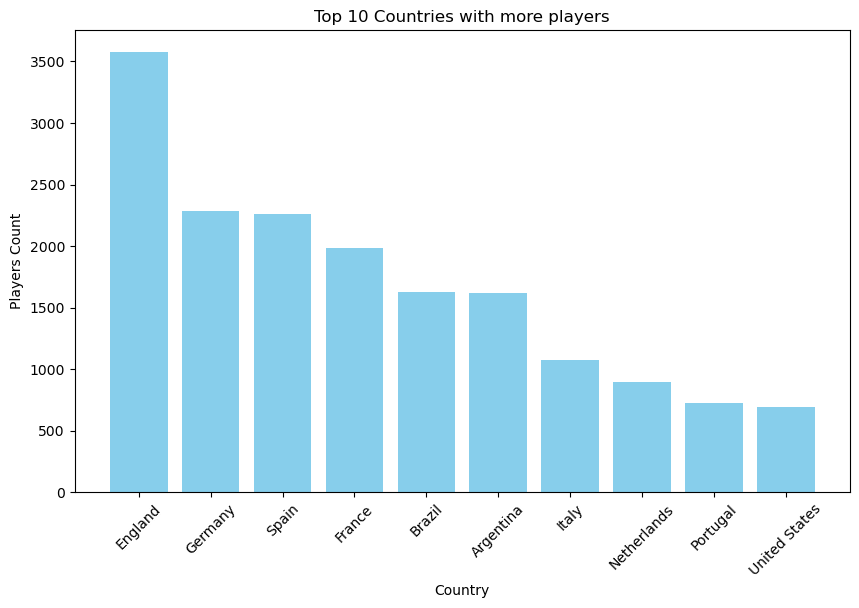

In [68]:

# Paso 1: Contar la cantidad de jugadores por país Fer
players_by_country = merged_df_clean["Nationality"].value_counts()

# Paso 2: Obtener el Top 5 países con más jugadores
top_5_countries = players_by_country.head(10)

# Paso 3: Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(top_5_countries.index, top_5_countries.values, color='skyblue')
plt.xlabel('Country')
plt.ylabel('Players Count')
plt.title('Top 10 Countries with more players')
plt.xticks(rotation=45)

# Paso 4: Mostrar la gráfica
plt.show()


### What countries have the best players in the world?

In [12]:
only_2022 = merged_df_clean[merged_df_clean["Year"] == 2022]
only_2021 = merged_df_clean[merged_df_clean["Year"] == 2021]
average_2022 = only_2022.groupby(["Nationality"]).mean()["Overall"]
average_2022.sort_values(ascending=False)

C:\Users\Fer\AppData\Local\Temp\ipykernel_7004\3570008790.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_2022 = only_2022.groupby(["Nationality"]).mean()["Overall"]


Nationality
Tanzania       74.000000
Mozambique     72.750000
Brazil         72.411477
Libya          72.250000
Fiji           72.000000
                 ...    
Malaysia       59.000000
India          56.918919
South Sudan    54.333333
Indonesia      53.500000
Hong Kong      53.000000
Name: Overall, Length: 168, dtype: float64

Text(0, 0.5, 'Rating')

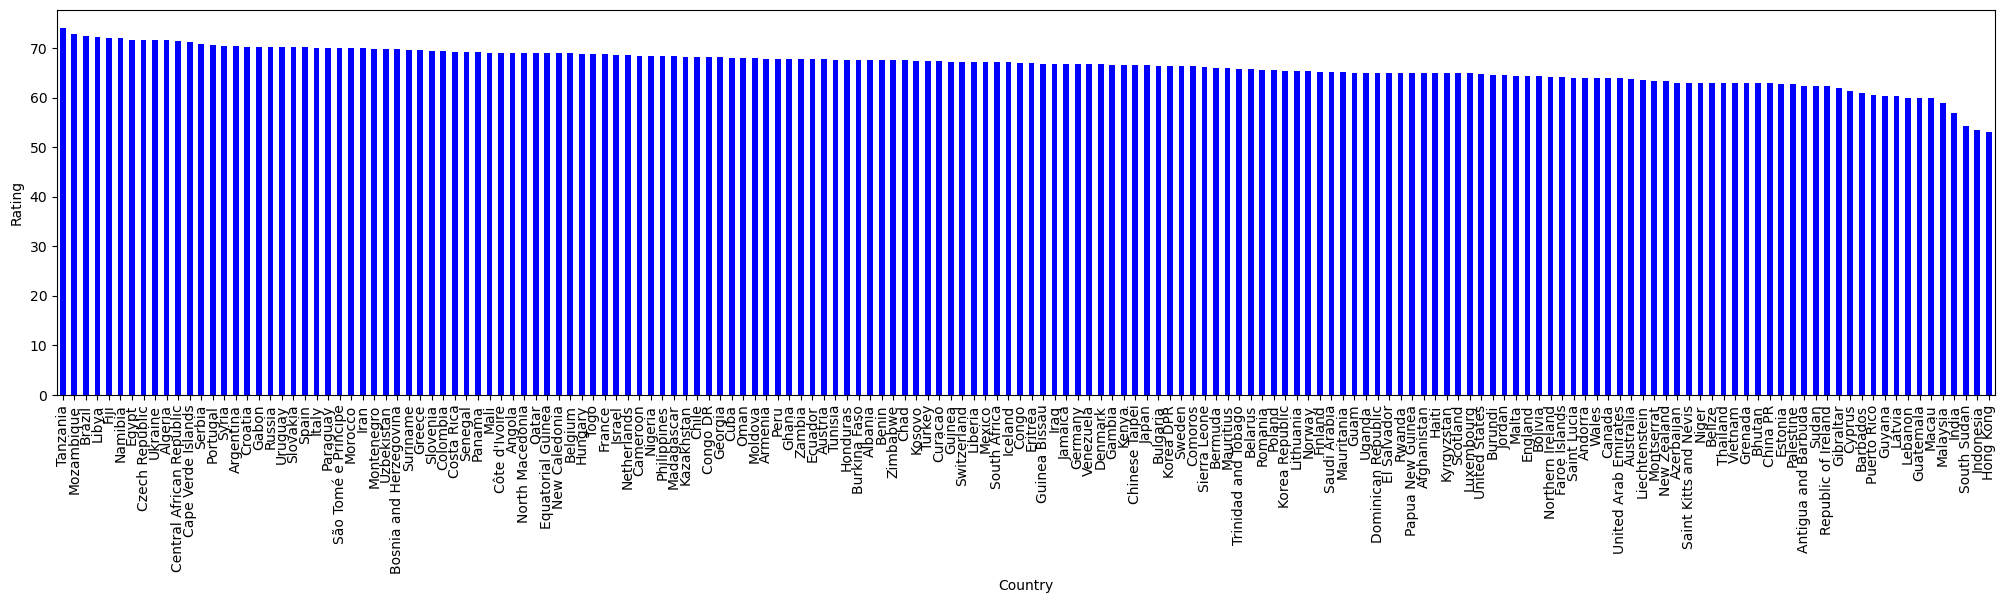

In [13]:
plot = average_2022.sort_values(ascending= False).plot.bar(color= "blue", figsize=(25,5))
plt.xlabel("Country")
plt.ylabel("Rating")

In [14]:
average_2021 = only_2021.groupby(["Nationality"]).mean()["Overall"]
average_2021.sort_values(ascending=False)

C:\Users\Fer\AppData\Local\Temp\ipykernel_7004\3874996939.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_2021 = only_2021.groupby(["Nationality"]).mean()["Overall"]


Nationality
Tanzania       76.000000
Syria          74.500000
Mozambique     73.250000
Fiji           73.000000
Brazil         72.192355
                 ...    
Malaysia       56.000000
South Sudan    56.000000
Nicaragua      56.000000
Indonesia      56.000000
Hong Kong      52.500000
Name: Overall, Length: 169, dtype: float64

Text(0, 0.5, 'Rating')

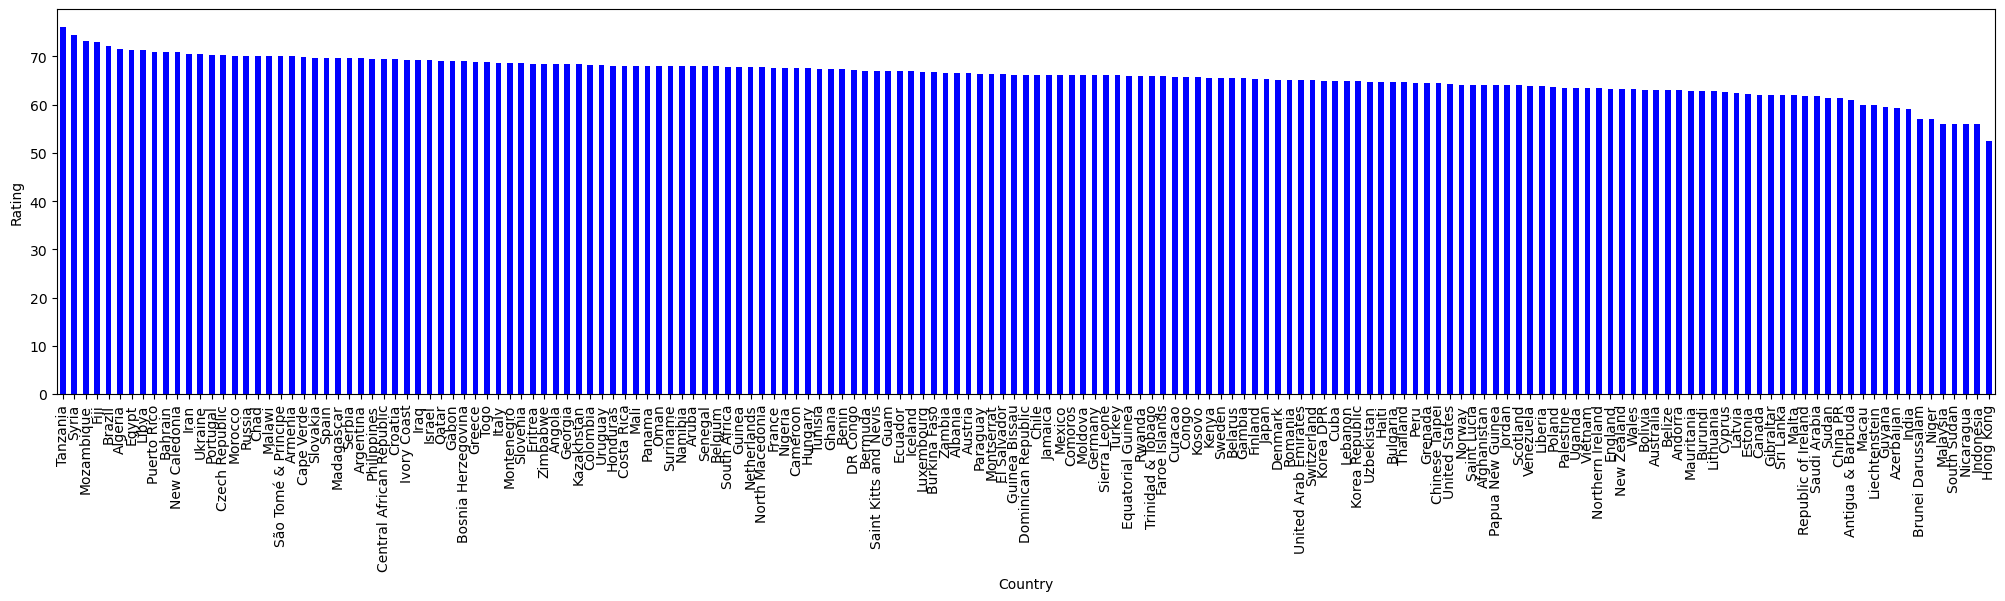

In [15]:
plot2 = average_2021.sort_values(ascending= False).plot.bar(color= "blue", figsize=(25,5))
plt.xlabel("Country")
plt.ylabel("Rating")

Nationality
Brazil         433
Spain          431
France         298
Argentina      222
England        211
Germany        194
Italy          189
Portugal       153
Netherlands    114
Uruguay        102
Name: Name, dtype: int64


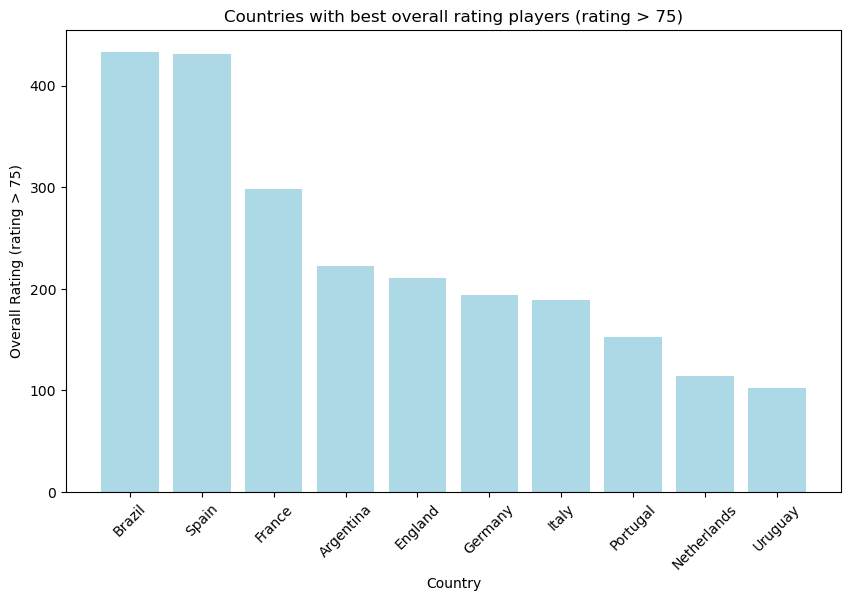

In [16]:
# Filtrar los jugadores que tienen best rating y agrupar por nacionalidad - Fer 
top_scorers_by_country = merged_df_clean[merged_df_clean['Overall'] > 75].groupby('Nationality')['Name'].count().nlargest(10)
print(top_scorers_by_country)
# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(top_scorers_by_country.index, top_scorers_by_country.values, color='lightblue')
plt.xlabel('Country')
plt.ylabel('Overall Rating (rating > 75)')
plt.title('Countries with best overall rating players (rating > 75)')
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()


In [17]:
average_2021 = only_2021.groupby(["Nationality"]).mean()["Overall"]
average_2021.sort_values(ascending=False)

C:\Users\Fer\AppData\Local\Temp\ipykernel_7004\3874996939.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_2021 = only_2021.groupby(["Nationality"]).mean()["Overall"]


Nationality
Tanzania       76.000000
Syria          74.500000
Mozambique     73.250000
Fiji           73.000000
Brazil         72.192355
                 ...    
Malaysia       56.000000
South Sudan    56.000000
Nicaragua      56.000000
Indonesia      56.000000
Hong Kong      52.500000
Name: Overall, Length: 169, dtype: float64

### Lets use the Geoapify API to locate the countries present in the dataset

In [18]:
# Top jugadores con mejor overall rating by country usando API para sacar el mapa - Fer
import requests
import json
from pprint import pprint
import hvplot.pandas
import geoviews as gv
from holoviews.element.tiles import EsriImagery

# Import the API key
from api_key import geoapify_key

# Obtener la lista de countries únicos de merged_df_clean
# clubs = merged_df_clean['Club'].unique()

# Utilizamos la lista de country filtrados que ya creamos
countries = top_scorers_by_country.index

country_coordinates = []

# Iterar sobre la lista de clubes
for country in countries:
    target_url = f"https://api.geoapify.com/v1/geocode/search?text={country}&format=json&apiKey={geoapify_key}"
    print(target_url)

    geo_data = requests.get(target_url).json()

    # Verificar si la localización fue encontrada
    if 'results' in geo_data and geo_data['results']:
        # Obtener la latitud y longitud del club
        latitude = geo_data['results'][0]['lat']
        longitude = geo_data['results'][0]['lon']
        country_coordinates.append((country, latitude, longitude))
    else:
        print(f"No se encontró la localización para el país: {country}")

# Imprimir la lista de coordenadas
print(country_coordinates)
# Crear un DataFrame con las coordenadas de los clubes
df_country_coordinates = pd.DataFrame(country_coordinates, columns=['Country', 'Latitud', 'Longitud'])

# Crear el mapa con hvplot.pandas
map_plot = df_country_coordinates.hvplot.points(x='Longitud', y='Latitud', geo=True, tiles='EsriImagery', hover_cols=['Country'], size=10,color='red')

# Mostrar el mapa
gv.tile_sources.CartoLight * map_plot


https://api.geoapify.com/v1/geocode/search?text=Brazil&format=json&apiKey=aa6f4571352f489fa93b3b35e97b0948
https://api.geoapify.com/v1/geocode/search?text=Spain&format=json&apiKey=aa6f4571352f489fa93b3b35e97b0948
https://api.geoapify.com/v1/geocode/search?text=France&format=json&apiKey=aa6f4571352f489fa93b3b35e97b0948
https://api.geoapify.com/v1/geocode/search?text=Argentina&format=json&apiKey=aa6f4571352f489fa93b3b35e97b0948
https://api.geoapify.com/v1/geocode/search?text=England&format=json&apiKey=aa6f4571352f489fa93b3b35e97b0948
https://api.geoapify.com/v1/geocode/search?text=Germany&format=json&apiKey=aa6f4571352f489fa93b3b35e97b0948
https://api.geoapify.com/v1/geocode/search?text=Italy&format=json&apiKey=aa6f4571352f489fa93b3b35e97b0948
https://api.geoapify.com/v1/geocode/search?text=Portugal&format=json&apiKey=aa6f4571352f489fa93b3b35e97b0948
https://api.geoapify.com/v1/geocode/search?text=Netherlands&format=json&apiKey=aa6f4571352f489fa93b3b35e97b0948
https://api.geoapify.com/v1

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitud,Latitud]   (Country)

## Club Analysis

### Lets look at the number of clubs present in Fifa 2021 and Fifa 2022

In [19]:
# Print the total number of clubs in the FIFA dataset - Vìctor
best_overall_2021 = df_21["Club"].nunique()
best_overall_2022 = df_22["Club"].nunique()
print('The total number of clubs in FIFA21:', best_overall_2021)
print('The total number of clubs in FIFA22:', best_overall_2022)

The total number of clubs in FIFA21: 840
The total number of clubs in FIFA22: 868


### What clubs have the highest average rated players in 2021?

In [20]:
#create groups by clubs in 2021 - Victor
groups_clubs_21 = df_21.set_index('Club').groupby(['Club'])

#create club overall average in 2021 - Victor
best_overall_average_21 = groups_clubs_21['Overall'].mean()
best_overall_total_21 = best_overall_average_21.sort_values(ascending= False).head(20)
best_overall_total_21

Club
FC Bayern München       81.461538
Siena                   79.000000
FC Anzhi Makhachkala    79.000000
Real Madrid             78.968750
Inter                   77.325000
Juventus                77.195122
FC Barcelona            77.097561
Changchun Yatai FC      77.000000
Corinthians             77.000000
Paris Saint-Germain     76.945946
Liverpool               76.589744
Palmeiras               76.500000
Palermo                 76.500000
Flamengo                76.428571
SL Benfica              76.388889
Napoli                  76.114286
Atlético Madrid         76.000000
Akhisar Belediyespor    76.000000
Manchester United       75.866667
Bayer 04 Leverkusen     75.500000
Name: Overall, dtype: float64

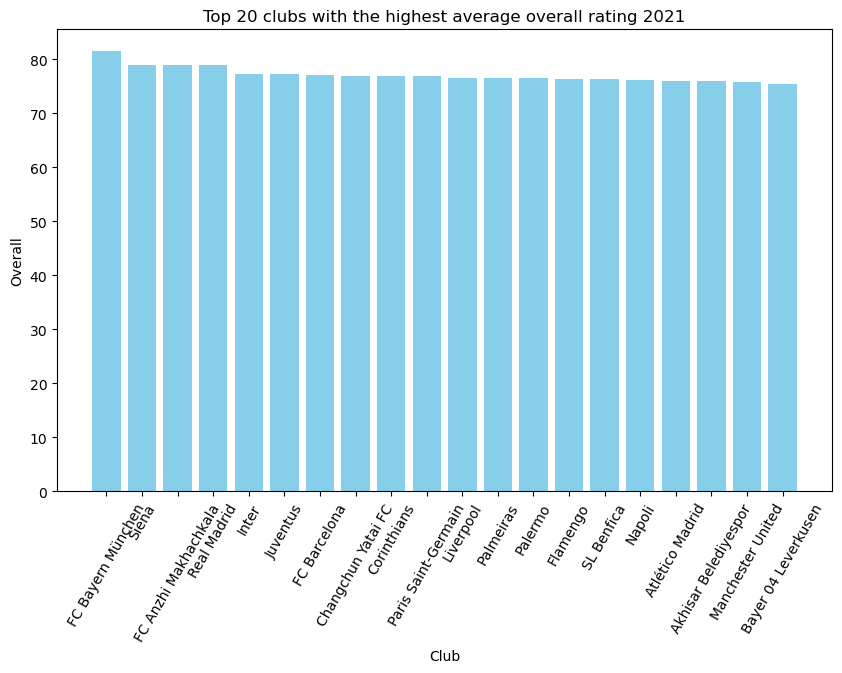

In [21]:
# Create figure clubs average overall 2021 - Victor
plt.figure(figsize=(10, 6))
plt.bar(best_overall_total_21.index, best_overall_total_21, color='skyblue')
plt.xlabel('Club')
plt.ylabel('Overall')
plt.title('Top 20 clubs with the highest average overall rating 2021')
plt.xticks(rotation=60)

plt.savefig('club_overall_21.png')

plt.show()

### What clubs have the highest average rated players in 2022?

In [22]:
#create groups by clubs in 2022 - Victor
groups_clubs_22= df_22.set_index('Club').groupby(['Club'])

#create club overall average in 2022 - Victor
best_overall_average_22= groups_clubs_22['Overall'].mean()
best_overall_total_22 = best_overall_average_22.sort_values(ascending= False).head(20)
best_overall_total_22

Club
Siena                              79.000000
FC Anzhi Makhachkala               79.000000
FC Bayern München                  78.848485
Juventus                           78.727273
Paris Saint-Germain                78.585366
Manchester United                  78.048780
FC Krasnodar                       78.000000
Atlético de Madrid                 77.405405
Napoli                             77.222222
FC Barcelona                       77.025000
SL Benfica                         76.888889
Flamengo                           76.818182
Inter                              76.666667
Jiangsu FC                         76.500000
Sport Club Corinthians Paulista    76.285714
Chelsea                            76.166667
Liverpool                          76.142857
Real Madrid CF                     76.052632
Real Sociedad                      76.031250
Rubin Kazan                        76.000000
Name: Overall, dtype: float64

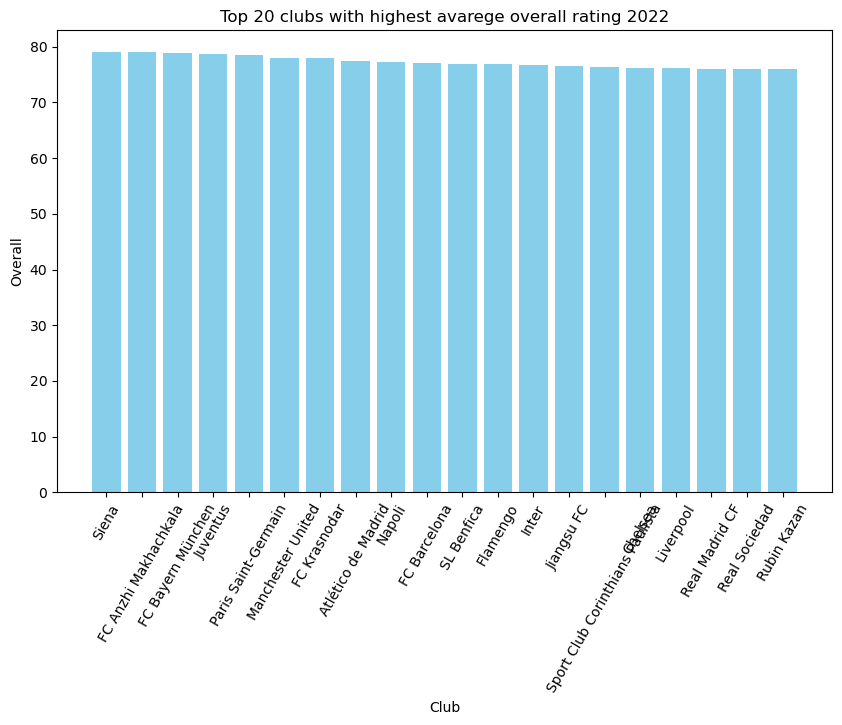

In [23]:
# Create figure clubs average overall 2022 - Victor
plt.figure(figsize=(10, 6))
plt.bar(best_overall_total_22.index, best_overall_total_22, color='skyblue')
plt.xlabel('Club')
plt.ylabel('Overall')
plt.title('Top 20 clubs with highest avarege overall rating 2022')
plt.xticks(rotation=60)
plt.savefig('club_overall_22.png')
# Paso 2: Mostrar la gráfica
plt.show()

### What clubs have the most diversity in its roster in 2021?

In [24]:
#Get the number of different nationalites by clubs in 2021 - Victor
most_diverse_nationalities_21= groups_clubs_21['Nationality'].nunique()
m_d_n_21= most_diverse_nationalities_21.sort_values(ascending= False).head(20)
m_d_n_21

Club
Fulham                    21
Lazio                     21
Juventus                  21
PAOK                      21
Chelsea                   20
Napoli                    20
TSG 1899 Hoffenheim       20
Liverpool                 20
Nottingham Forest         19
Inter                     19
Crystal Palace            19
Everton                   19
Newcastle United          18
Milan                     18
AS Monaco                 18
Brighton & Hove Albion    18
Leicester City            18
Arsenal                   18
Fenerbahçe SK             17
Sporting CP               17
Name: Nationality, dtype: int64

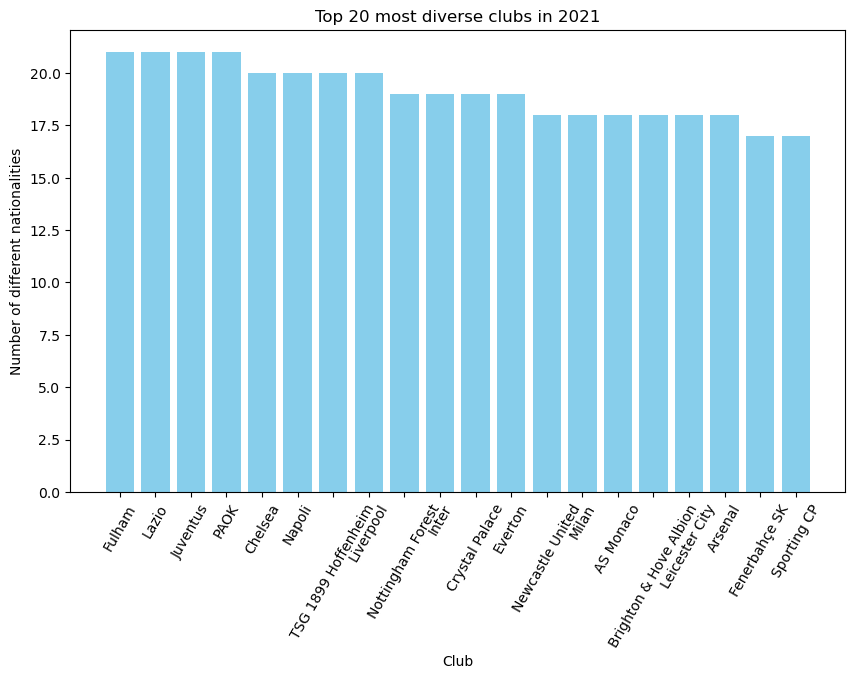

In [25]:
# Create figure number of nationalities per club 2021 - Victor
plt.figure(figsize=(10, 6))
plt.bar(m_d_n_21.index, m_d_n_21, color='skyblue')
plt.xlabel('Club')
plt.ylabel('Number of different nationalities')
plt.title('Top 20 most diverse clubs in 2021')
plt.xticks(rotation=60)
plt.savefig('club_nationalities_21.png')
plt.show()

### What clubs have the most diversity in its roster in 2022?

In [26]:
#Get the number of different nationalites by clubs in 2022 - Victor
most_diverse_nationalities_22= groups_clubs_22['Nationality'].nunique()
m_d_n_22= most_diverse_nationalities_22.sort_values(ascending= False).head(20)
m_d_n_22

Club
Watford                    22
LOSC Lille                 22
Arsenal                    21
Torino F.C.                21
Leicester City             20
Lazio                      20
Spezia                     20
Royal Charleroi S.C.       20
Brentford                  19
Genoa                      19
Fulham                     19
Inter                      19
PAOK                       19
Roma                       19
Eintracht Frankfurt        19
SV Zulte Waregem           19
AC Milan                   19
PSV                        19
Wolverhampton Wanderers    18
Bologna                    18
Name: Nationality, dtype: int64

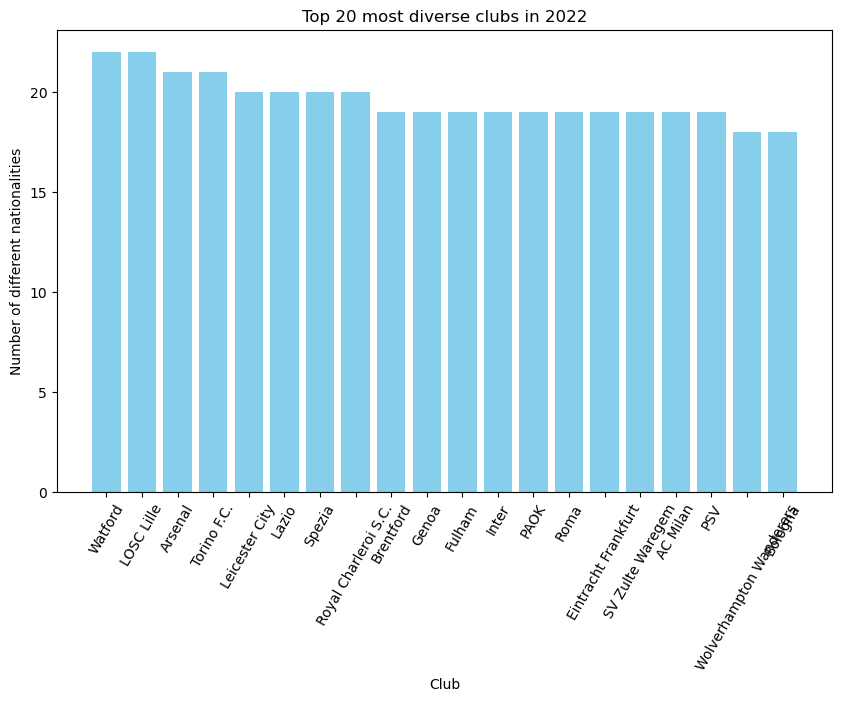

In [27]:
# Create figure number of nationalities per club 2022 - Victor
plt.figure(figsize=(10, 6))
plt.bar(m_d_n_22.index, m_d_n_22, color='skyblue')
plt.xlabel('Club')
plt.ylabel('Number of different nationalities')
plt.title('Top 20 most diverse clubs in 2022')
plt.xticks(rotation=60)
plt.savefig('club_nationalities_22.png')


plt.show()

## Player Analysis

### How many players are participant in Fifa 2021 and Fifa 2022?

In [28]:
# Separate data by year - Fabian
only_2022 = merged_df_clean[merged_df_clean["Year"] == 2022]
only_2021 = merged_df_clean[merged_df_clean["Year"] == 2021]
# Print the total number of players in the fifa dataset - Fabian
print('The total number of players in FIFA 2021 : {}'.format(df_21.shape[0]))
print('The total number of players in FIFA 2022 : {}'.format(df_22.shape[0]))

The total number of players in FIFA 2021 : 17103
The total number of players in FIFA 2022 : 16709


### Lets look at some statistical data from 2022

In [29]:
# Overview statistical data from df_22 - Fabian
only_2022.describe()

Year             ID           Age       Overall     Potential  \
count  16709.0   16709.000000  16709.000000  16709.000000  16709.000000   
mean    2022.0  220563.064396     25.727033     67.645161     72.571249   
std        0.0   38496.296752      5.048828      6.456152      5.686657   
min     2022.0      27.000000     16.000000     28.000000     38.000000   
25%     2022.0  203895.000000     22.000000     63.000000     69.000000   
50%     2022.0  229255.000000     25.000000     68.000000     72.000000   
75%     2022.0  245369.000000     29.000000     72.000000     76.000000   
max     2022.0  264704.000000     54.000000     93.000000     95.000000   

              Value        Weight           Wage  Jersey Number  \
count  1.024400e+04  16709.000000   16709.000000   16683.000000   
mean   5.117152e+06     75.363157   90107.486983      20.459330   
std    9.975564e+06      7.169802  212366.248934      17.700121   
min    0.000000e+00     49.049000       0.000000       1.000000   
25%    1.400000e+06     70.070000    3000.000000       8.000000   
50%    2.100000e+06     75.075000    7000.000000      17.000000   
75%    4.125000e+06     80.080000   24000.000000      27.000000   
max    1.940000e+08    110.110000  950000.000000      99.000000   

       Best Overall Rating  
count         16709.000000  
mean             68.564187  
std               6.254443  
min              36.000000  
25%              65.000000  
50%              68.000000  
75%              73.000000  
max              93.000000

### Interesting:
##### The average age is 25.7
##### The youngest player is 16 years old
##### The oldest player is 54 years old
##### The average overall is 67.6
##### The lowest overall by a player is 28
##### The highest overall by a player is 93
##### The average weight is 75.3 Kg
##### The min weight is 49 Kg
##### The max weight is 110 Kg

### Who were the best 10 players in 2022?

In [30]:
# Top 10 players by overall rating - Fabian
top_10_2022 = only_2022.sort_values(by="Overall", ascending = False).head(10)[['Name','Nationality','Club','Best Position','Height','Overall','Potential']]
top_10_2022

Name Nationality                 Club Best Position  \
17132           L. Messi   Argentina  Paris Saint-Germain            RW   
17136     R. Lewandowski      Poland    FC Bayern München            ST   
31346           J. Oblak    Slovenia   Atlético de Madrid            GK   
17106       K. De Bruyne     Belgium      Manchester City            CM   
17185          K. Mbappé      France  Paris Saint-Germain            ST   
17139  Cristiano Ronaldo    Portugal    Manchester United            ST   
17167          Neymar Jr      Brazil  Paris Saint-Germain            LW   
17174           N. Kanté      France              Chelsea           CDM   
30992      M. ter Stegen     Germany         FC Barcelona            GK   
29452           M. Neuer     Germany    FC Bayern München            GK   

      Height  Overall  Potential  
17132  170cm       93         93  
17136  185cm       92         92  
31346  188cm       91         93  
17106  181cm       91         91  
17185  182cm       91         95  
17139  187cm       91         91  
17167  175cm       91         91  
17174  168cm       90         90  
30992  187cm       90         92  
29452  193cm       90         90

### Who were the worst 10 players in 2022?

In [31]:
# Bottom 10 players by overall rating - Fabian
bottom_10_2022 = only_2022.sort_values(by="Overall", ascending = False).tail(10)[['Name','Nationality','Club','Best Position','Height','Overall','Potential']]
bottom_10_2022

Name          Nationality                 Club  \
32346        R. Gallagher  Republic of Ireland           Finn Harps   
31606            G. Singh                India       Mumbai City FC   
31646           C. Porter  Republic of Ireland           Derry City   
31701  E. Lalchhanchhuaha                India  NorthEast United FC   
32688            F. Molla                India   ATK Mohun Bagan FC   
32787      15 T. Fletcher              England    Wycombe Wanderers   
32695     18 T. Käßemodel              Germany    FC Erzgebirge Aue   
33101        16 E. Redman                Wales       Newport County   
33674    10 I. Baraclough              England           Free Agent   
33811       07 A. Censori                Italy               Arezzo   

      Best Position Height  Overall  Potential  
32346           CAM  180cm       47         61  
31606            LB  175cm       47         64  
31646            RM  175cm       47         59  
31701            RM  167cm       47         60  
32688            ST  161cm       47         67  
32787            CB  183cm       46         52  
32695            CM  173cm       46         46  
33101            CB  184cm       44         57  
33674            CM  185cm       44         65  
33811            ST  177cm       28         38

### Lets compare a player's actual skill with their potential

In [32]:
# Top 10 players by Potential - Fabian
top_10_2022_potential = only_2022.sort_values(by="Potential", ascending = False).head(10)

# Top 10 players with potential rating + Top 10 players with overall rating - Fabian
top_10_combined_df=pd.concat([top_10_2022_potential,top_10_2022], axis=0)
top_10_combined_df=top_10_combined_df.drop_duplicates(subset='Name')
combined_df=top_10_combined_df.groupby('Name')[['Overall','Potential']].max()
combined_df=combined_df.sort_values('Overall',ascending=False)
combined_df

Overall  Potential
Name                                   
L. Messi                  93         93
R. Lewandowski            92         92
Cristiano Ronaldo         91         91
J. Oblak                  91         93
K. De Bruyne              91         91
K. Mbappé                 91         95
Neymar Jr                 91         91
M. Neuer                  90         90
M. ter Stegen             90         92
N. Kanté                  90         90
G. Donnarumma             89         93
E. Haaland                88         93
F. de Jong                87         92
T. Alexander-Arnold       87         92
P. Foden                  84         92

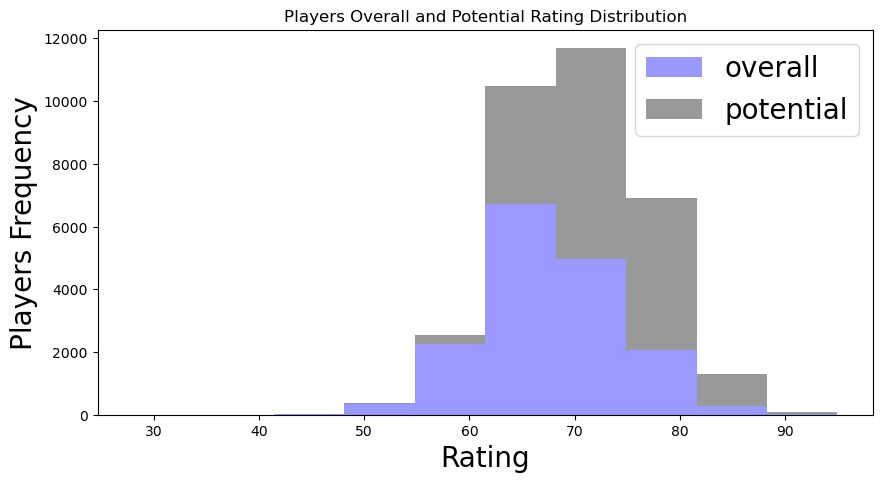

In [33]:
# All players overall and potential Rating Distribution - Fabian
plt.figure(figsize=(10,5))
plt.hist([only_2022.Overall,only_2022.Potential],color=['blue','black'],alpha=0.4,stacked=True)
plt.title('Players Overall and Potential Rating Distribution')
plt.xlabel('Rating',fontsize=20)
plt.ylabel('Players Frequency',fontsize=20)
plt.legend(['overall','potential'],fontsize=20)
plt.savefig("overall_vs_potential_distribution.png")

C:\Users\Fer\AppData\Local\Temp\ipykernel_7004\1439783367.py:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,110,10)


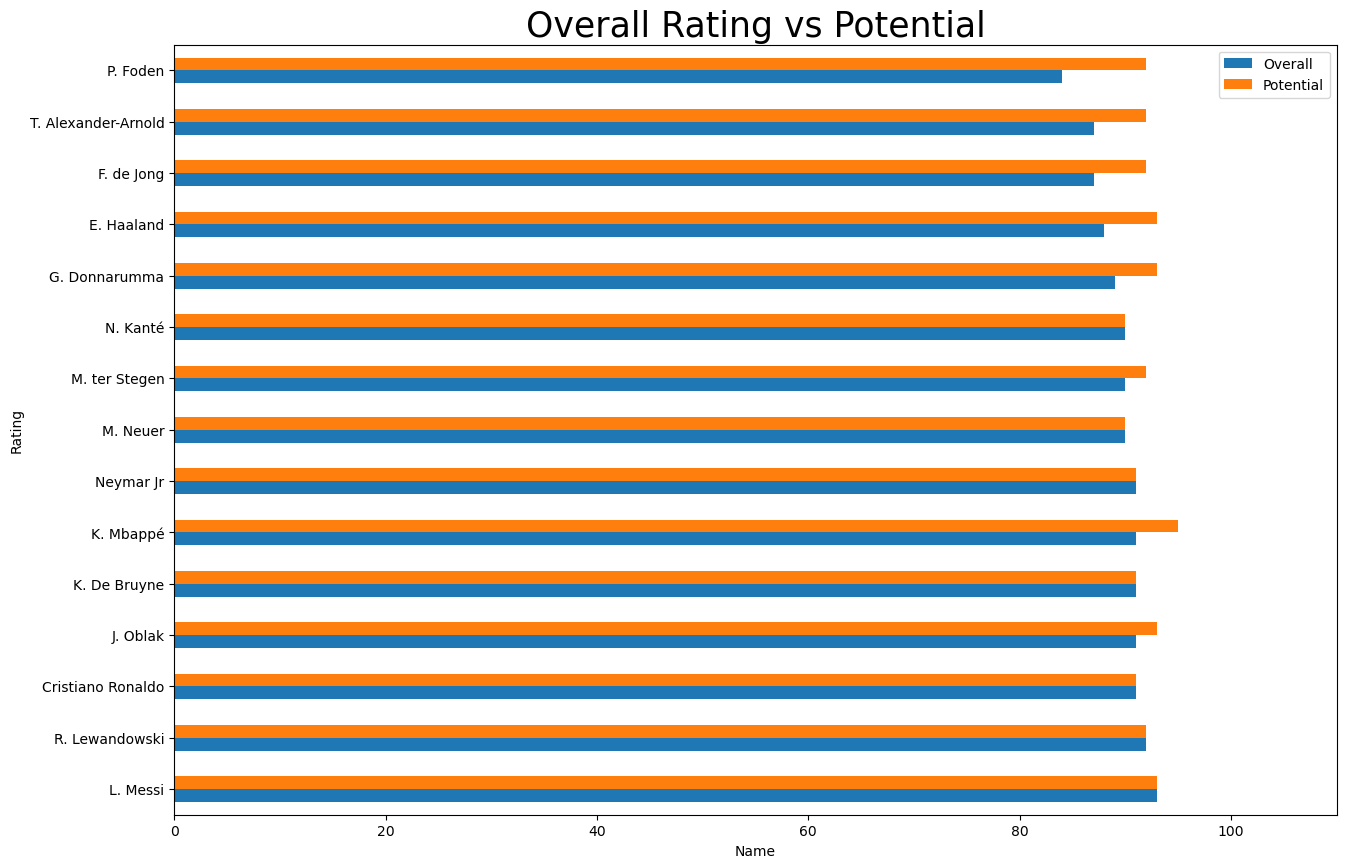

In [34]:
# Overall Rating vs. Potential bar chart - Fabian
combined_df.plot(kind='barh',figsize=(15,10))
plt.title("Overall Rating vs Potential",fontsize=25)
plt.xlim(0,110,10)
plt.xlabel("Name")
plt.ylabel("Rating")
plt.legend()
plt.savefig("overall_vs_potential.png")

### Interesting: There is strong correlation between potential and the actual skill of a player

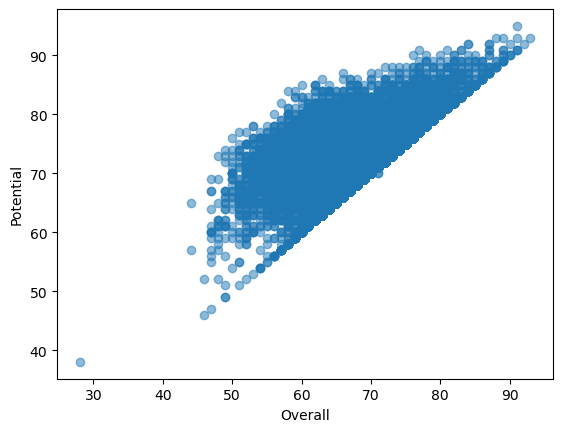

In [35]:
# There is strong correlation between potential and the actual skill of a player -Fabian
x_value = only_2022["Overall"]
y_value = only_2022["Potential"]
plt.scatter(x_value, y_value, alpha=0.5)
plt.xlabel("Overall")
plt.ylabel("Potential")
plt.savefig("Rating_vs_Potential.png")

### Lets look at players earnings (Euros)

In [36]:
# Top 10 players with the highest value - Fabian
top_value_2022 = only_2022.sort_values(by="Value", ascending = False).head(10)[['Value', 'Name','Nationality','Club','Best Position','Overall','Potential']]
top_value_2022

Value                 Name  Nationality                 Club  \
17185  194000000.0            K. Mbappé       France  Paris Saint-Germain   
17354  137500000.0           E. Haaland       Norway    Borussia Dortmund   
17142  129500000.0              H. Kane      England    Tottenham Hotspur   
17167  129000000.0            Neymar Jr       Brazil  Paris Saint-Germain   
17106  125500000.0         K. De Bruyne      Belgium      Manchester City   
17120  119500000.0           F. de Jong  Netherlands         FC Barcelona   
31710  119500000.0        G. Donnarumma        Italy  Paris Saint-Germain   
17136  119500000.0       R. Lewandowski       Poland    FC Bayern München   
17958  116500000.0            J. Sancho      England    Manchester United   
17127  114000000.0  T. Alexander-Arnold      England            Liverpool   

      Best Position  Overall  Potential  
17185            ST       91         95  
17354            ST       88         93  
17142            ST       90         90  
17167            LW       91         91  
17106            CM       91         91  
17120            CM       87         92  
31710            GK       89         93  
17136            ST       92         92  
17958           CAM       87         91  
17127            RB       87         92

### What does the distribution of all the earnings look like?

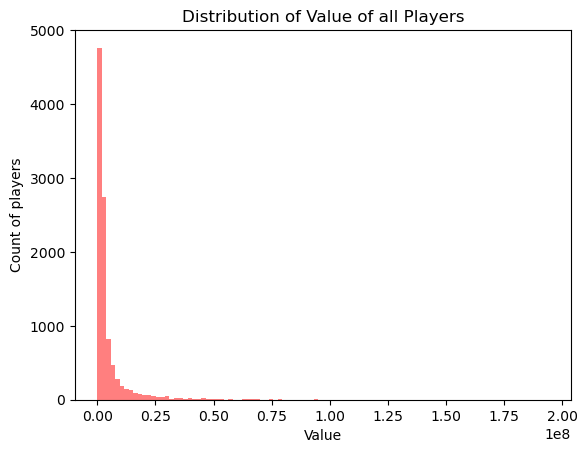

In [37]:
# Values distribution amongst all players - Fabian
plt.hist(only_2022['Value'], bins=100, color='red', alpha = 0.5)
plt.title("Distribution of Value of all Players")
plt.xlabel("Value")
plt.ylabel("Count of players")
plt.savefig("Distribution_earnings.png")
plt.show()

### What and how many different positions can be played?

In [38]:
#printing total different positions
c=0
for i in only_2022["Best Position"].unique():
    if ',' not in i:
        print(i)
        c+=1
print('\n\nTotal {} different playing positions.'.format(c))

CAM
CM
ST
LB
CDM
CB
RB
LM
RW
LW
CF
LWB
RM
RWB
GK


Total 15 different playing positions.


In [39]:
#Taking each different position players in each seperate dataframes
separate_position=[only_2022[only_2022["Best Position"]=='GK'].value_counts().sum(),
only_2022[only_2022["Best Position"]=='ST'].value_counts().sum(),
only_2022[only_2022["Best Position"]=='CB'].value_counts().sum(),
only_2022[only_2022["Best Position"]=='LW'].value_counts().sum(),
only_2022[only_2022["Best Position"]=='RW'].value_counts().sum(),
only_2022[only_2022["Best Position"]=='CDM'].value_counts().sum(),
only_2022[only_2022["Best Position"]=='CM'].value_counts().sum(),
only_2022[only_2022["Best Position"]=='RB'].value_counts().sum(),
only_2022[only_2022["Best Position"]=='LB'].value_counts().sum(),
only_2022[only_2022["Best Position"]=='CF'].value_counts().sum(),
only_2022[only_2022["Best Position"]=='LM'].value_counts().sum(),
only_2022[only_2022["Best Position"]=='RM'].value_counts().sum(),
only_2022[only_2022["Best Position"]=='LWB'].value_counts().sum(),
only_2022[only_2022["Best Position"]=='CAM'].value_counts().sum(),
only_2022[only_2022["Best Position"]=='RWB'].value_counts().sum()]

#Storing separate_position list values in a dictionary
c=0
dic={}
for i in only_2022["Best Position"].unique():
    if ',' not in i:
        dic[i]=separate_position[c]
        c+=1
dic

{'CAM': 712,
 'CM': 1541,
 'ST': 1847,
 'LB': 119,
 'CDM': 214,
 'CB': 810,
 'RB': 744,
 'LM': 541,
 'RW': 474,
 'LW': 66,
 'CF': 491,
 'LWB': 814,
 'RM': 191,
 'RWB': 1444,
 'GK': 210}

### Visualization of the most played positions in Fifa 2022

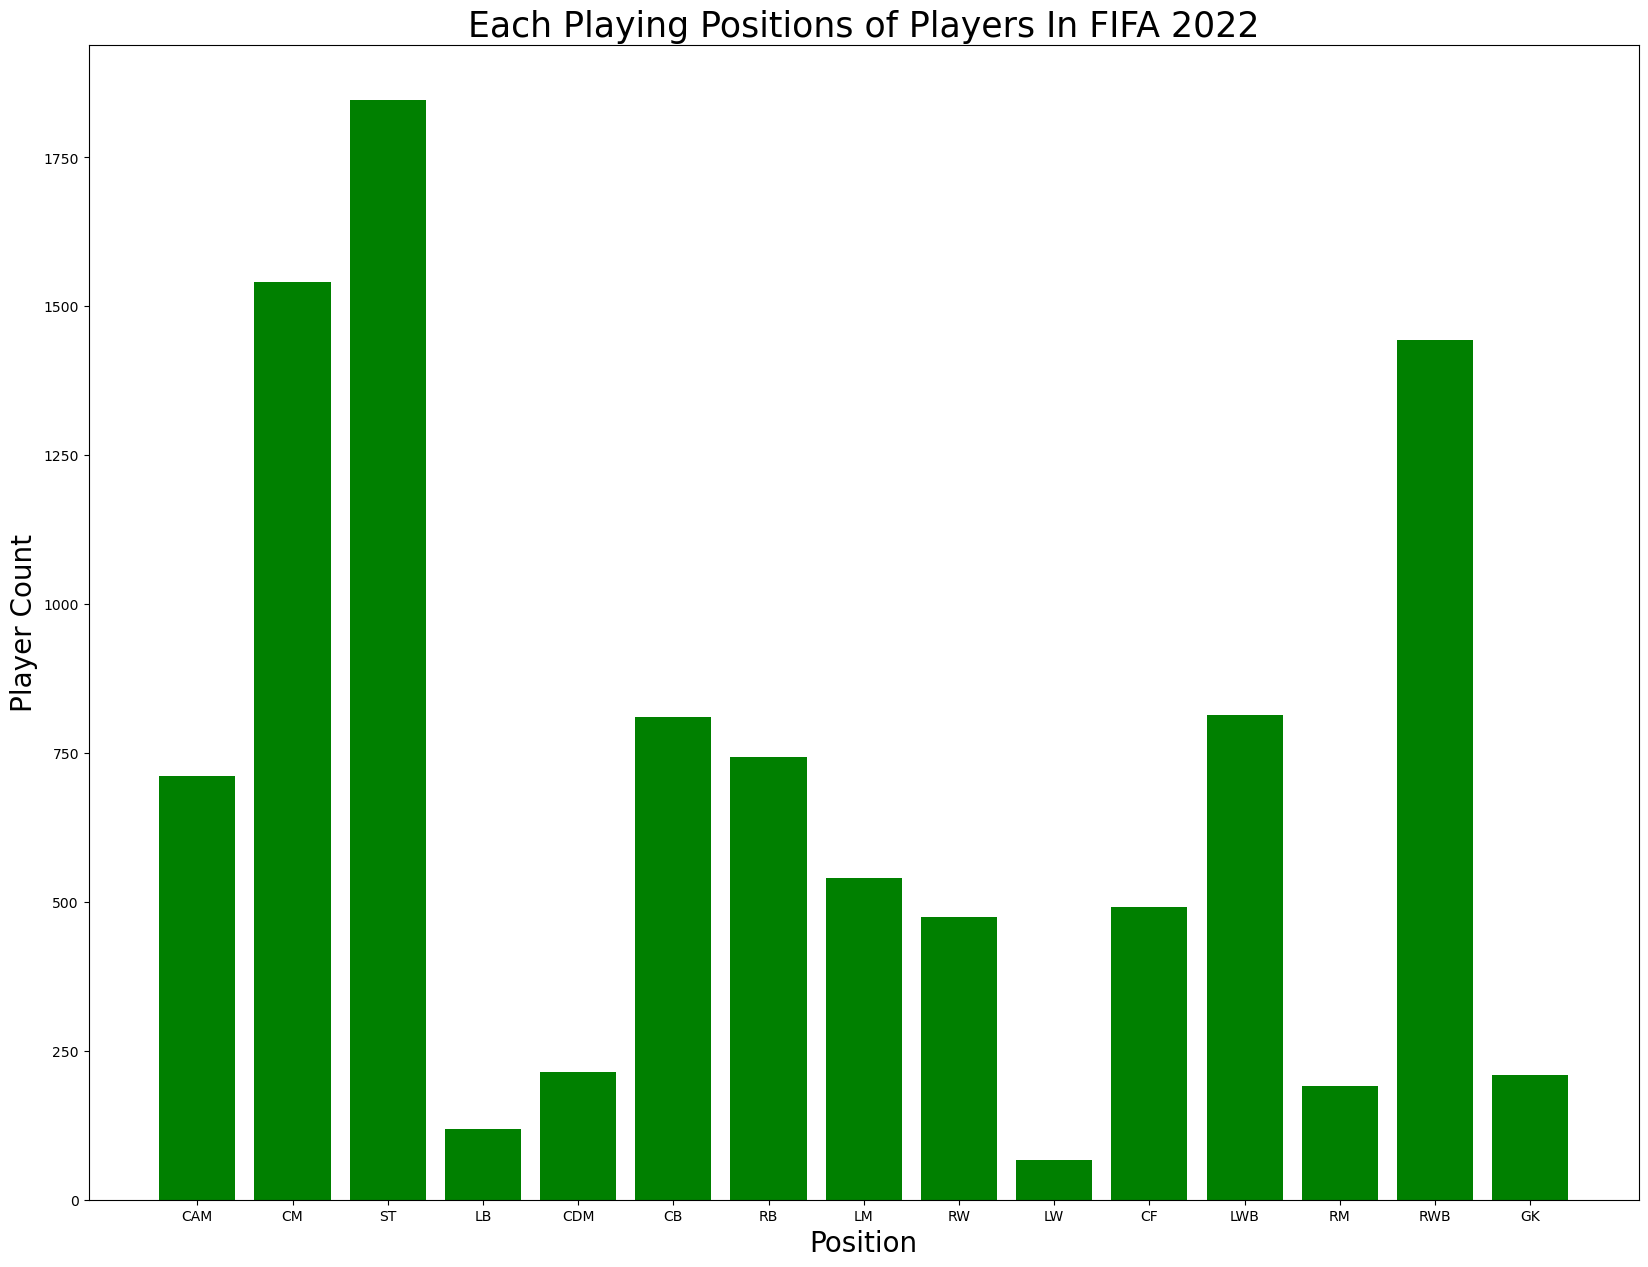

In [40]:
#Let's plot each playing positions of Players in FIFA 22
keys=dic.keys()
values=dic.values()
plt.figure(figsize=(20,15))
plt.xlabel('Position',fontsize=20)
plt.ylabel('Player Count',fontsize=20)
plt.title('Each Playing Positions of Players In FIFA 2022',fontsize=25)
plt.bar(keys,values,color='green')
plt.show()

### Earnings by position

In [41]:
price_posiiton_22 = only_2022.groupby(["Best Position"]).mean()["Value"]
price_posiiton_22

C:\Users\Fer\AppData\Local\Temp\ipykernel_7004\386823657.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_posiiton_22 = only_2022.groupby(["Best Position"]).mean()["Value"]


Best Position
CAM    6.049827e+06
CB     4.576445e+06
CDM    4.939360e+06
CF     8.952239e+06
CM     7.049732e+06
GK     5.110350e+06
LB     4.622947e+06
LM     4.816293e+06
LW     8.794118e+06
LWB    5.013613e+06
RB     4.605893e+06
RM     3.738875e+06
RW     5.577103e+06
RWB    4.230000e+06
ST     4.831930e+06
Name: Value, dtype: float64

Text(0, 0.5, 'Value')

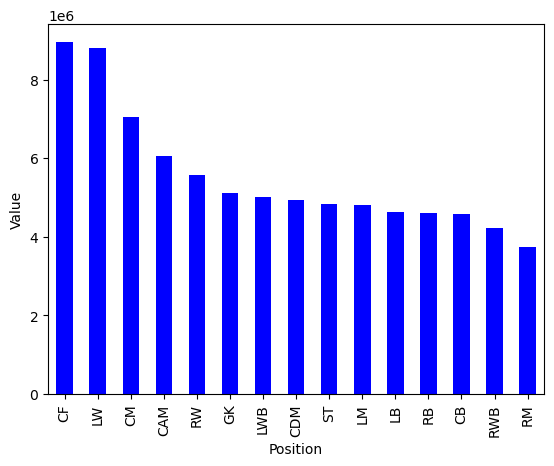

In [42]:
plot22 = price_posiiton_22.sort_values(ascending= False).plot.bar(color= "blue")
plt.xlabel("Position")
plt.ylabel("Value")

In [43]:
price_posiiton_21 = only_2021.groupby(["Best Position"]).mean()["Value"]
price_posiiton_21

C:\Users\Fer\AppData\Local\Temp\ipykernel_7004\1596651504.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_posiiton_21 = only_2021.groupby(["Best Position"]).mean()["Value"]


Best Position
CAM    5.878793e+06
CB     4.631241e+06
CDM    4.969077e+06
CF     7.501587e+06
CM     6.260036e+06
GK     5.289792e+06
LB     4.811257e+06
LM     5.122016e+06
LW     7.501905e+06
LWB    4.756522e+06
RB     4.447260e+06
RM     4.272848e+06
RW     6.013095e+06
RWB    4.722951e+06
ST     4.982725e+06
Name: Value, dtype: float64

Text(0, 0.5, 'Value')

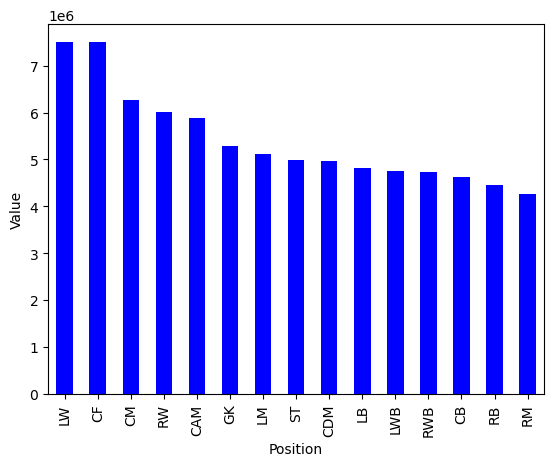

In [44]:
plot21 = price_posiiton_21.sort_values(ascending= False).plot.bar(color= "blue")
plt.xlabel("Position")
plt.ylabel("Value")

### To simplify, we grouped all positions into 4 categories: 'Mid Field', 'Forward', 'Defender', 'Goalkeeper'

In [45]:
conditions = [
    (only_2022['Best Position'].isin(["RM", "CDM", "CM", "LM", "RW", "LW"])),
    (only_2022['Best Position'].isin( ["ST", "CF", "CAM"])),
    (only_2022['Best Position'].isin(["CB", "LB", "RB", "RWB", "LWB"])),
    (only_2022['Best Position'].isin(["GK"]))
    ]
values = ['Mid field', 'Forward', 'Defender', 'Goalkeeper']
only_2022['Position Group'] = np.select(conditions, values)

C:\Users\Fer\AppData\Local\Temp\ipykernel_7004\3075091212.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_2022['Position Group'] = np.select(conditions, values)


### A table that displays the best player by each position category

In [46]:
# Top 5 players by each position group: Defender, Forward, Goalkeeper, Mid Field
top5_position_group = only_2022.groupby(["Position Group"]).apply(
    lambda x:x.sort_values(by="Overall", ascending = False, axis = 0).head(5)
    )[['Name','Nationality','Club','Best Position','Height', 'Overall','Potential']]
top5_position_group

Name  Nationality                 Club  \
Position Group                                                              
Defender       17344        V. van Dijk  Netherlands            Liverpool   
               17115       Sergio Ramos        Spain  Paris Saint-Germain   
               17228         17 P. Lahm      Germany    FC Bayern München   
               19857         Rúben Dias     Portugal      Manchester City   
               17200       A. Robertson     Scotland            Liverpool   
Forward        17136     R. Lewandowski       Poland    FC Bayern München   
               17185          K. Mbappé       France  Paris Saint-Germain   
               17139  Cristiano Ronaldo     Portugal    Manchester United   
               17142            H. Kane      England    Tottenham Hotspur   
               17304         K. Benzema       France       Real Madrid CF   
Goalkeeper     31346           J. Oblak     Slovenia   Atlético de Madrid   
               29452           M. Neuer      Germany    FC Bayern München   
               30992      M. ter Stegen      Germany         FC Barcelona   
               28294            Ederson       Brazil      Manchester City   
               31710      G. Donnarumma        Italy  Paris Saint-Germain   
Mid field      17132           L. Messi    Argentina  Paris Saint-Germain   
               17167          Neymar Jr       Brazil  Paris Saint-Germain   
               17106       K. De Bruyne      Belgium      Manchester City   
               17174           N. Kanté       France              Chelsea   
               17158            S. Mané      Senegal            Liverpool   

                     Best Position Height  Overall  Potential  
Position Group                                                 
Defender       17344            CB  193cm       89         89  
               17115            CB  184cm       88         88  
               17228           RWB  170cm       88         88  
               19857            CB  187cm       87         91  
               17200            LB  178cm       87         88  
Forward        17136            ST  185cm       92         92  
               17185            ST  182cm       91         95  
               17139            ST  187cm       91         91  
               17142            ST  188cm       90         90  
               17304            CF  185cm       89         89  
Goalkeeper     31346            GK  188cm       91         93  
               29452            GK  193cm       90         90  
               30992            GK  187cm       90         92  
               28294            GK  188cm       89         91  
               31710            GK  196cm       89         93  
Mid field      17132            RW  170cm       93         93  
               17167            LW  175cm       91         91  
               17106            CM  181cm       91         91  
               17174           CDM  168cm       90         90  
               17158            LW  175cm       89         89

### What is the distribution of 'Preferred Foot' amongst players?

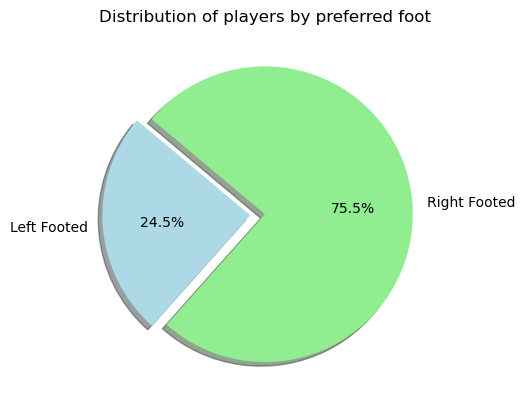

<Figure size 640x480 with 0 Axes>

In [47]:
# Distribution of players by preferred foot - Fer

import matplotlib.pyplot as plt

# Contar la cantidad de zurdos y diestros
left_footed = merged_df_clean[merged_df_clean['Preferred Foot'] == 'Left']
right_footed = merged_df_clean[merged_df_clean['Preferred Foot'] == 'Right']
left_count = len(left_footed)
right_count = len(right_footed)

# Crear una lista con los datos para el gráfico
labels = ['Left Footed', 'Right Footed']
sizes = [left_count, right_count]

# Configurar las opciones del gráfico
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # Separar la rebanada "Left Footed" del resto del gráfico

# Crear el gráfico de pastel
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Agregar un título
plt.title('Distribution of players by preferred foot')

# Mostrar el gráfico
plt.show()
plt.savefig("Preferred_foot.png")


In [48]:

# Leer el archivo CSV limpio FER 
merged_df_clean = pd.read_csv("Merged_Table_3.csv")

# Convertir las columnas "Value" y "Wage" a cadenas
merged_df_clean["Value"] = merged_df_clean["Value"].astype(str)
merged_df_clean["Wage"] = merged_df_clean["Wage"].astype(str)

# Remover los símbolos '€' y 'M' de la columna "Value"
merged_df_clean["Value"] = merged_df_clean["Value"].str.replace('€', '').str.replace('M', '')

# Convertir el valor a un número decimal
merged_df_clean["Value"] = pd.to_numeric(merged_df_clean["Value"], errors='coerce')

# Multiplicar el valor por 1,000 para los valores en millones
merged_df_clean["Value"] = merged_df_clean["Value"] * 1000000

# Remover los símbolos '€' y 'K' de la columna "Wage"
merged_df_clean["Wage"] = merged_df_clean["Wage"].str.replace('€', '').str.replace('K', '')

# Convertir el valor a un número decimal
merged_df_clean["Wage"] = pd.to_numeric(merged_df_clean["Wage"], errors='coerce')

# Multiplicar el valor por 1,000 para los valores en miles
merged_df_clean["Wage"] = merged_df_clean["Wage"] * 1000




# Filter the dataset based on the preferred foot
left_footed = merged_df_clean[merged_df_clean['Preferred Foot'] == 'Left']
right_footed = merged_df_clean[merged_df_clean['Preferred Foot'] == 'Right']

# Calculate the average value and wage for left-footed players
average_value_left = left_footed['Value'].mean()
average_wage_left = left_footed['Wage'].mean()

# Calculate the average value and wage for right-footed players
average_value_right = right_footed['Value'].mean()
average_wage_right = right_footed['Wage'].mean()

# Print the results
print(f"Average Value (Left Footed): {average_value_left}")
print(f"Average Value (Right Footed): {average_value_right}")



Average Value (Left Footed): 5255200.5288673425
Average Value (Right Footed): 5086278.4621127285


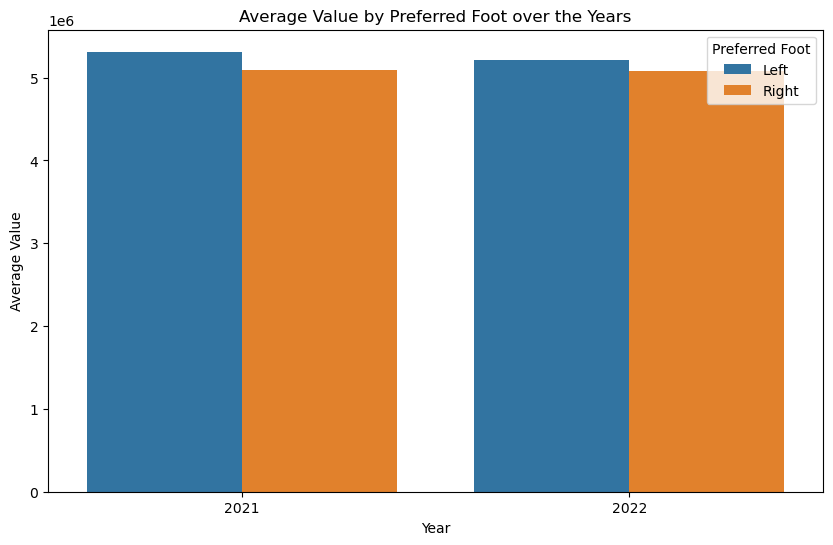

In [49]:
import seaborn as sns

# Filter the dataset based on the preferred foot
left_footed = merged_df_clean[merged_df_clean['Preferred Foot'] == 'Left']
right_footed = merged_df_clean[merged_df_clean['Preferred Foot'] == 'Right']

# Group the data by year and preferred foot, and calculate the average value and wage
grouped_data = merged_df_clean.groupby(['Year', 'Preferred Foot'])[['Value', 'Wage']].mean().reset_index()

# Create bar plots to show the variation of average value and wage for each preferred foot over the years
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Year', y='Value', hue='Preferred Foot')
plt.title('Average Value by Preferred Foot over the Years')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.show()



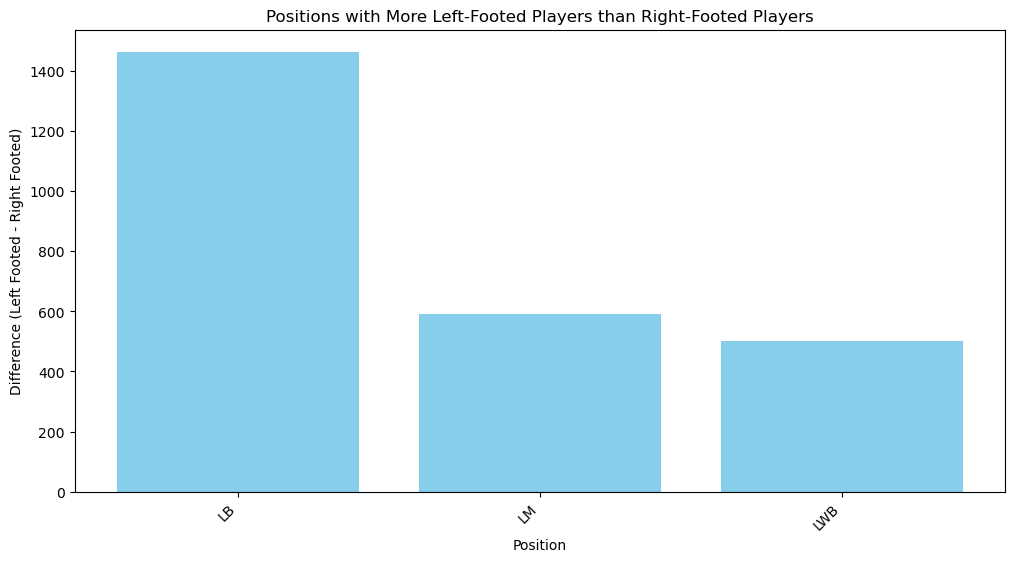

In [73]:

# Agrupar los datos por posición y contar la cantidad de jugadores con pies izquierdos y derechos en cada grupo
footed_counts = merged_df_clean.groupby(['Best Position', 'Preferred Foot']).size().reset_index(name='Count')

# Filtrar solo los datos de jugadores con pies izquierdos
left_footed_counts = footed_counts[footed_counts['Preferred Foot'] == 'Left']

# Filtrar solo los datos de jugadores con pies derechos
right_footed_counts = footed_counts[footed_counts['Preferred Foot'] == 'Right']

# Unir los datos de jugadores con pies izquierdos y derechos en una sola tabla
merged_counts = left_footed_counts.merge(right_footed_counts, on='Best Position', suffixes=('_Left', '_Right'))

# Calcular la diferencia entre la cantidad de jugadores con pies izquierdos y derechos en cada posición
merged_counts['Difference'] = merged_counts['Count_Left'] - merged_counts['Count_Right']

# Filtrar solo las posiciones con más jugadores con pies izquierdos que derechos
positions_with_more_left_footed = merged_counts[merged_counts['Difference'] > 0]

# Mostrar el resultado ordenado por la diferencia en orden descendente
positions_with_more_left_footed = positions_with_more_left_footed.sort_values('Difference', ascending=False)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
plt.bar(positions_with_more_left_footed['Best Position'], positions_with_more_left_footed['Difference'], color='skyblue')
plt.xlabel('Position')
plt.ylabel('Difference (Left Footed - Right Footed)')
plt.title('Positions with More Left-Footed Players than Right-Footed Players')
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.show()


### How many players of Mexican nationality participated in Fifa 2022?

In [50]:
# fun fact: how many players in the dataset are from Mexico? - Fabian
mex_players_df=only_2022[only_2022.Nationality=="Mexico"][['Name','Nationality','Club','Best Position','Height','Overall','Potential']]
mex_players_df

Name Nationality                     Club Best Position  \
17194       J. Corona      Mexico                 FC Porto            RM   
17209      H. Herrera      Mexico       Atlético de Madrid            CM   
17325     A. Guardado      Mexico      Real Betis Balompié           CDM   
17394      R. Jiménez      Mexico  Wolverhampton Wanderers            ST   
17462       V. Guzmán      Mexico                  Pachuca           CAM   
...               ...         ...                      ...           ...   
33530        D. Ochoa      Mexico           Real Salt Lake            GK   
33561       C. Moreno      Mexico                  Pachuca            GK   
33651         J. León      Mexico                Puebla FC            GK   
33663  R. Castellanos      Mexico              Club Necaxa            GK   
33671        C. Ramos      Mexico            CF Monterrey             GK   

      Height  Overall  Potential  
17194  173cm       82         82  
17209  185cm       81         81  
17325  169cm       78         78  
17394  188cm       83         83  
17462  175cm       75         78  
...      ...      ...        ...  
33530  188cm       66         76  
33561  190cm       59         68  
33651  188cm       57         63  
33663  184cm       58         68  
33671  182cm       57         66  

[312 rows x 7 columns]

### Out of all 312 players of Mexican natinality, who were the top 10 by 'Overall'?

In [51]:
# Top 10 Mexican players - Fabian
top_10_mex = mex_players_df.sort_values(by="Overall", ascending = False).head(10)
top_10_mex

Name Nationality                       Club Best Position  \
17394    R. Jiménez      Mexico    Wolverhampton Wanderers            ST   
17962       C. Vela      Mexico             Los Angeles FC            RW   
17194     J. Corona      Mexico                   FC Porto            RM   
17209    H. Herrera      Mexico         Atlético de Madrid            CM   
17901     H. Lozano      Mexico                     Napoli            RW   
32347      G. Ochoa      Mexico               Club América            GK   
17325   A. Guardado      Mexico        Real Betis Balompié           CDM   
20420  J. Hernández      Mexico                  LA Galaxy            ST   
31979   A. Talavera      Mexico  Club Universidad Nacional            GK   
17755  L. Rodríguez      Mexico            Tigres U.A.N.L.            RB   

      Height  Overall  Potential  
17394  188cm       83         83  
17962  177cm       83         83  
17194  173cm       82         82  
17209  185cm       81         81  
17901  175cm       81         82  
32347  190cm       80         80  
17325  169cm       78         78  
20420  175cm       78         78  
31979  186cm       78         78  
17755  177cm       77         77

### Fun fact: What are the most common 'Jersey Numbers'?

Año 2021: Número de Jersey más Común = 10.0
Año 2022: Número de Jersey más Común = 10.0


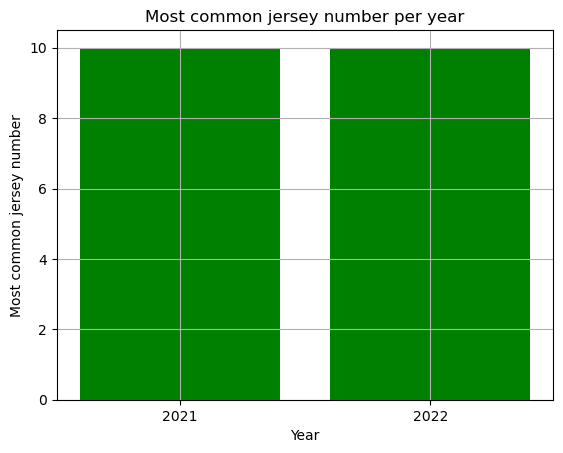

In [52]:
# Most Common Jersey Number per year - Fer

# Leer el archivo CSV limpio
merged_df_clean = pd.read_csv("Merged_Table_3.csv")

# Encontrar el número más común de jersey por cada año
most_common_jersey_per_year = merged_df_clean.groupby("Year")["Jersey Number"].agg(lambda x: x.mode().iat[0])


# Imprimir el resultado del número de jersey más común por año
for year, jersey_number in most_common_jersey_per_year.items():
    print(f"Año {year}: Número de Jersey más Común = {jersey_number}")

# Crear una gráfica de barras
plt.bar(most_common_jersey_per_year.index, most_common_jersey_per_year.values,color="green")

# Personalizar la gráfica
plt.xlabel("Year")
plt.ylabel("Most common jersey number")
plt.title("Most common jersey number per year")
plt.xticks(most_common_jersey_per_year.index)
plt.grid(True)

# Mostrar la gráfica
plt.show()


### relationship between a player's weight and their overall rating?

In [53]:
weight_2022 = only_2022.groupby(["Weight"]).mean()["Overall"].to_frame()
weight_2022_final = weight_2022.reset_index()
weight_2022_final

C:\Users\Fer\AppData\Local\Temp\ipykernel_7004\2595355649.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weight_2022 = only_2022.groupby(["Weight"]).mean()["Overall"].to_frame()


Weight    Overall
0    49.049  59.000000
1    51.051  60.000000
2    52.052  48.000000
3    53.053  65.000000
4    54.054  58.500000
5    55.055  64.818182
6    56.056  66.307692
7    57.057  64.846154
8    58.058  64.894737
9    59.059  63.757576
10   60.060  65.088435
11   61.061  66.219512
12   62.062  66.525180
13   63.063  66.796954
14   64.064  65.639098
15   65.065  65.927313
16   66.066  67.596542
17   67.067  66.944444
18   68.068  66.583851
19   69.069  67.581858
20   70.070  66.354566
21   71.071  67.549729
22   72.072  67.221622
23   73.073  67.641084
24   74.074  67.644391
25   75.075  66.986874
26   76.076  68.031172
27   77.077  68.126330
28   78.078  67.741150
29   79.079  68.272300
30   80.080  67.964706
31   81.081  68.484305
32   82.082  68.638989
33   83.083  68.933472
34   84.084  69.126761
35   85.085  68.746073
36   86.086  69.271375
37   87.087  68.424242
38   88.088  69.699187
39   89.089  69.114286
40   90.090  69.964072
41   91.091  69.417722
42   92.092  70.280488
43   93.093  68.929825
44   94.094  72.800000
45   95.095  68.945946
46   96.096  72.000000
47   97.097  68.363636
48   98.098  66.692308
49   99.099  67.800000
50  100.100  72.166667
51  101.101  67.750000
52  102.102  67.666667
53  103.103  74.000000
54  104.104  68.000000
55  105.105  62.000000
56  107.107  63.000000
57  110.110  65.000000

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120.]),
 [Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100'),
  Text(110.0, 0, '110'),
  Text(120.0, 0, '120')])

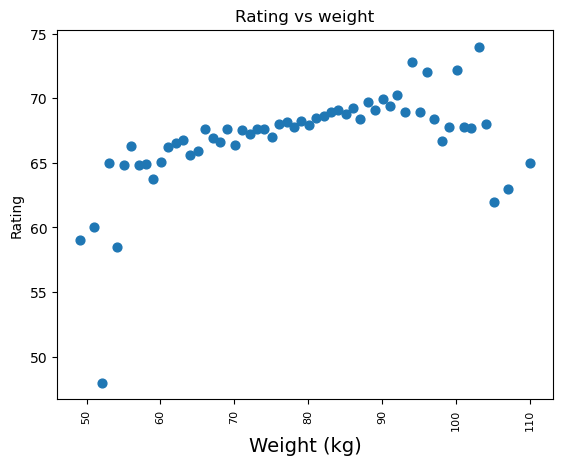

In [54]:
plt.scatter(weight_2022_final["Weight"], weight_2022_final["Overall"], s=40)
plt.ylabel('Rating')
plt.xlabel('Weight (kg)',fontsize =14)
plt.title('Rating vs weight')
plt.xticks(rotation=90, fontsize =8)

In [55]:
weight = weight_2022_final.iloc[:,0]
rating = weight_2022_final.iloc[:,1]
correlation = st.pearsonr(weight,rating)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.54


In [56]:
weight_2021 = only_2021.groupby(["Weight"]).mean()["Overall"].to_frame()
weight_2021_final = weight_2021.reset_index()
weight_2021_final

C:\Users\Fer\AppData\Local\Temp\ipykernel_7004\3918389748.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weight_2021 = only_2021.groupby(["Weight"]).mean()["Overall"].to_frame()


Weight    Overall
0    49.895120  64.000000
1    52.163080  60.000000
2    53.070264  65.000000
3    53.977448  56.250000
4    54.884632  61.333333
5    55.791816  64.307692
6    57.152592  64.000000
7    58.059776  65.315789
8    58.966960  61.586207
9    59.874144  63.388889
10   60.781328  65.107843
11   62.142104  65.113208
12   63.049288  65.112195
13   63.956472  65.118812
14   64.863656  64.806911
15   66.224432  66.719677
16   67.131616  66.323596
17   68.038800  65.601997
18   68.945984  66.334000
19   69.853168  65.370588
20   71.213944  66.601307
21   72.121128  66.450766
22   73.028312  67.033879
23   73.935496  67.053318
24   74.842680  65.769111
25   76.203456  66.805693
26   77.110640  67.121447
27   78.017824  67.043716
28   78.925008  67.433871
29   79.832192  67.065686
30   81.192968  67.592275
31   82.100152  67.768116
32   83.007336  68.665929
33   83.914520  68.216958
34   84.821704  68.510753
35   86.182480  69.199248
36   87.089664  68.563452
37   87.996848  68.823045
38   88.904032  68.976562
39   89.811216  69.666667
40   91.171992  70.694444
41   92.079176  70.907895
42   92.986360  69.897436
43   93.893544  71.303030
44   94.800728  69.000000
45   96.161504  71.500000
46   97.068688  71.800000
47   97.975872  66.100000
48   98.883056  69.333333
49   99.790240  66.777778
50  101.151016  72.666667
51  102.058200  65.000000
52  102.965384  66.000000
53  103.872568  70.500000
54  107.047712  66.000000
55  110.222856  65.000000

(array([ 40.,  50.,  60.,  70.,  80.,  90., 100., 110., 120.]),
 [Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90'),
  Text(100.0, 0, '100'),
  Text(110.0, 0, '110'),
  Text(120.0, 0, '120')])

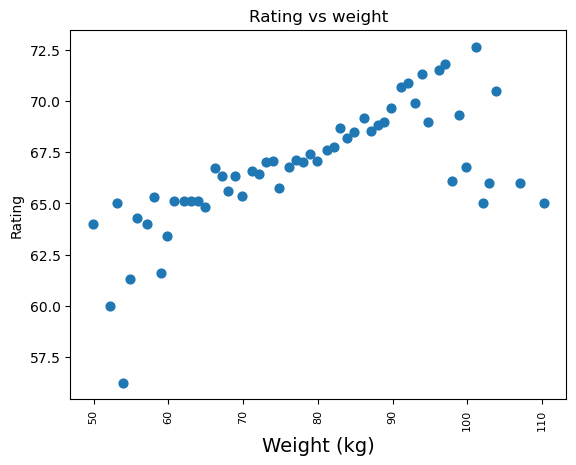

In [57]:
plt.scatter(weight_2021_final["Weight"], weight_2021_final["Overall"], s=40)
plt.ylabel('Rating')
plt.xlabel('Weight (kg)',fontsize =14)
plt.title('Rating vs weight')
plt.xticks(rotation=90, fontsize =8)

In [58]:
w2 = weight_2021_final.iloc[:,0]
r2 = weight_2021_final.iloc[:,1]
correlation2 = st.pearsonr(w2,r2)
print(f"The correlation between both factors is {round(correlation2[0],2)}")

The correlation between both factors is 0.69


### Analyzing the distribution of all player's age

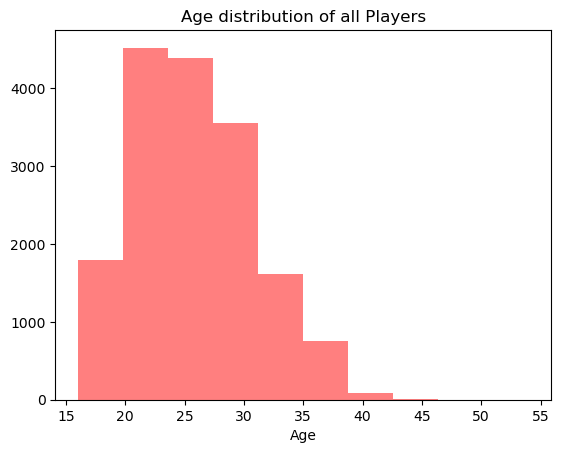

In [59]:
# Players age distribution
plt.hist(only_2022['Age'], bins=10, color='red', alpha = 0.5)
plt.xlabel("Age")
plt.title("Age distribution of all Players")
plt.show()

### Relationship between player's age and their overall rating

In [60]:
age_2022 = only_2022.groupby(["Age"]).mean()["Overall"]
age_2022 = age_2022.reset_index()
age_2022

C:\Users\Fer\AppData\Local\Temp\ipykernel_7004\1337037499.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_2022 = only_2022.groupby(["Age"]).mean()["Overall"]


Age    Overall
0    16  55.750000
1    17  57.368030
2    18  59.551948
3    19  60.772469
4    20  62.746823
5    21  65.142975
6    22  66.058671
7    23  67.711091
8    24  68.283940
9    25  68.971505
10   26  69.675097
11   27  69.683953
12   28  70.294964
13   29  70.224511
14   30  70.371293
15   31  70.788158
16   32  70.523885
17   33  71.091743
18   34  71.210762
19   35  71.177515
20   36  70.356098
21   37  70.175182
22   38  71.402597
23   39  69.102041
24   40  71.083333
25   41  64.700000
26   42  68.000000
27   43  70.000000
28   45  71.000000
29   54  59.000000

In [61]:
x_axis = age_2022["Age"]
y_axis = age_2022["Overall"]

Text(0, 0.5, 'Rating')

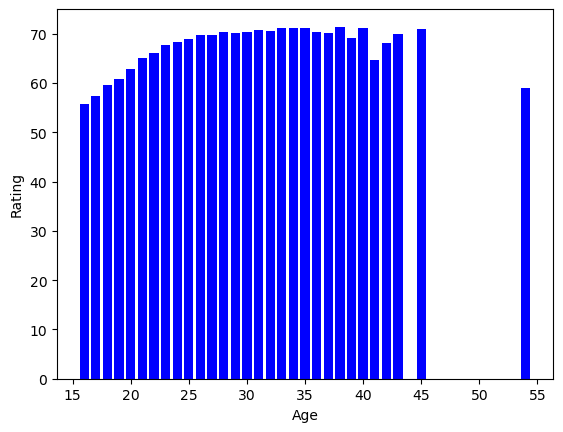

In [62]:
plt.bar(x_axis, y_axis, color="b", alpha=1, align="center")
plt.xlabel("Age")
plt.ylabel("Rating")

In [63]:
age = age_2022.iloc[:,0]
rating = age_2022.iloc[:,1]
correlation1 = st.pearsonr(age,rating)
print(f"The correlation between both factors is {round(correlation1[0],2)}")

The correlation between both factors is 0.42


In [64]:
age_2021 = only_2021.groupby(["Age"]).mean()["Overall"]
age_2021 = age_2021.reset_index()
age_2021

C:\Users\Fer\AppData\Local\Temp\ipykernel_7004\1633839879.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  age_2021 = only_2021.groupby(["Age"]).mean()["Overall"]


Age    Overall
0    16  55.108696
1    17  56.671975
2    18  57.865154
3    19  59.261905
4    20  62.189748
5    21  63.583846
6    22  65.552374
7    23  66.658592
8    24  68.054455
9    25  68.540367
10   26  69.136237
11   27  69.803502
12   28  70.344444
13   29  70.287559
14   30  70.714286
15   31  71.130990
16   32  71.295113
17   33  71.724731
18   34  71.509589
19   35  71.767068
20   36  70.534591
21   37  71.621053
22   38  70.343750
23   39  70.342105
24   40  69.350000
25   41  65.777778
26   42  71.285714
27   43  64.000000
28   47  48.000000
29   53  59.000000

In [65]:
x2_axis = age_2021["Age"]
y2_axis = age_2021["Overall"]

Text(0, 0.5, 'Rating')

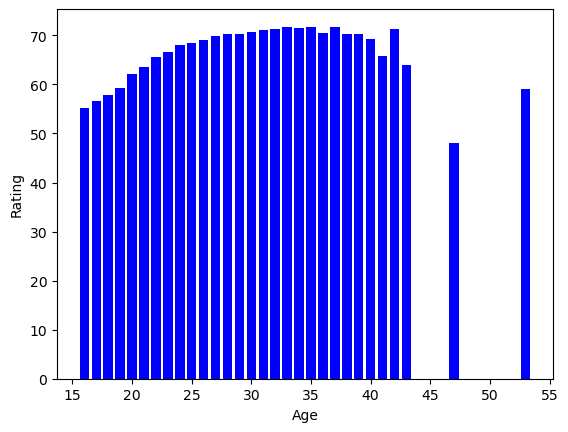

In [66]:
plt.bar(x2_axis, y2_axis, color="b", alpha=1, align="center")
plt.xlabel("Age")
plt.ylabel("Rating")

In [67]:
age2 = age_2021.iloc[:,0]
rating2 = age_2021.iloc[:,1]
correlation2 = st.pearsonr(age2,rating2)
print(f"The correlation between both factors is {round(correlation2[0],2)}")

The correlation between both factors is 0.15
